<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_KMeanVsTfIDf_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: K-Mean Vs TF-IDF
###AUTHOR: Sheida Talei

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [1]:
# !pip install --target=$nb_path kneed

  Using cached https://files.pythonhosted.org/packages/c3/6b/e130913aaaad1373060e259ab222ca2330672db696b297b082c3f3089fcc/kneed-0.7.0-py2.py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from kneed import KneeLocator

In [3]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [4]:

X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
Y= X_and_Y.Label
X = X_and_Y.text

In [5]:
# X_and_Y_test = removeEmptyRows('/content/drive/MyDrive/Final/test_temp.csv')
# Y_test= X_and_Y_test.Label
# X_test = X_and_Y_test.text

In [6]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [7]:
persian_stop_word = list(getStopWord())


In [8]:
vectorizer = TfidfVectorizer(stop_words= persian_stop_word ,  max_features = 2000 ) 
X_train_vector  = vectorizer.fit_transform(X)

In [9]:
#source: https://towardsdatascience.com/k-means-clustering-with-python-code-explained-5a792bd19548
kmean=KMeans(n_clusters=3)
kmean.fit(X_train_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
y_kmeans = kmean.predict(X_train_vector)

In [11]:
#we can see our three centers by using the following command
kmean.cluster_centers_

array([[0.00019623, 0.00050958, 0.00101709, ..., 0.00068905, 0.00065501,
        0.00093844],
       [0.00021345, 0.00097809, 0.00040234, ..., 0.0001954 , 0.        ,
        0.00247014],
       [0.        , 0.00133463, 0.00429853, ..., 0.00083457, 0.00048044,
        0.0003946 ]])

In [12]:
#To check the labels created, we can use the following command. It gives the labels created for our data
kmean.labels_

array([0, 0, 2, ..., 1, 0, 0], dtype=int32)

In [13]:
#Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:
kmean.inertia_

40767.12471680361

In [14]:
frame = pd.DataFrame(X_train_vector)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

0    32342
2     6810
1     2662
Name: cluster, dtype: int64

In [19]:
# fitting multiple k-means algorithms and storing the values in an empty list
#source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#source:https://realpython.com/k-means-clustering-python/
SSE = []
for cluster in range(1,50):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_train_vector)
    SSE.append(kmeans.inertia_)
    print (cluster)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


ValueError: ignored

Text(0, 0.5, 'Inertia')

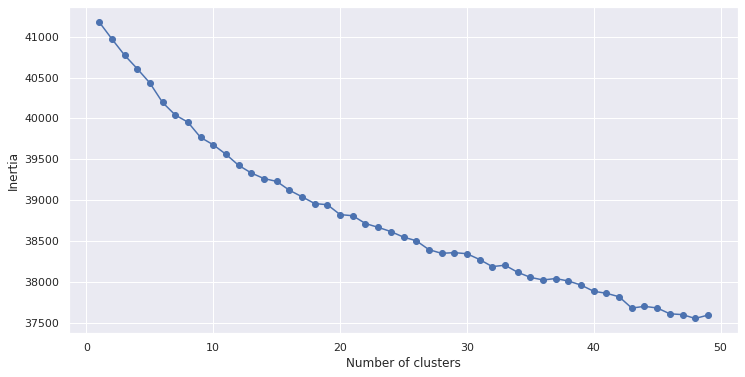

In [20]:
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
kl = KneeLocator(range(1, 50), SSE, curve="convex", direction="decreasing")
true_k = kl.elbow
print (true_k)

22


In [28]:
kmean=KMeans(n_clusters=true_k)
kmean.fit(X_train_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=22, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
# true_k=3
#Source: https://pythonprogramminglanguage.com/kmeans-text-clustering/
print("Top terms per cluster:")
order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :50]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 بهائی
 شهروند
 ایران
 ائین
 سال
 مخفی
 جامعه
 بهائیان
 ساکن
 زندان
 ویهودی
 درایران
 اسلام
 نفوذ
 یهود
 بازداشت
 ان
 دین
 اسرائیل
 ازاد
 خاندان
 دیانت
 حبس
 کن
 فرقه
 بهاالله
 پدر
 شبکه
 بهائیت
 ایین
 قرار
 دانشگاه
 اطلاعات
 باب
 شیراز
 تو
 جهانی
 پیامبر
 حکومت
 اینکه
 دار
 حکم
 روز
 ماه
 محکوم
 انقلاب
 انها
 وثیقه
 تاریخ
 امنیت
Cluster 1:
 دوست
 دار
 عزیز
 خیلی
 کن
 تو
 باش
 دارن
 عوض
 پسر
 خوب
 وقت
 بیشتر
 شو
 دارم
 دیگه
 الان
 امنیت
 منو
 نداره
 گو
 کار
 دل
 ممنون
 همیشه
 عشق
 ادم
 چقدر
 خودم
 بین
 واقعا
 دید
 دختر
 اینکه
 چقد
 اصلا
 دشمن
 حتی
 زیاد
 فکر
 ان
 دست
 حالا
 کاش
 ای
 دنیا
 میکنم
 واسه
 کنه
 خدا
Cluster 2:
 امام
 حسن
 عسکر
 زمان
 السلام
 علیه
 فرمود
 فرما
 عج
 ان
 شهادت
 بیعت
 عسگر
 خدا
 خداوند
 مهدی
 تسلیت
 کند
 العقول
 تحف
 دل
 حضرت
 الله
 غیبت
 مؤمن
 ظهور
 امامت
 باش
 فرزند
 کن
 حال
 ای
 نمود
 باد
 نمی
 کار
 هرکس
 شیعیان
 انجام
 ترین
 اله
 روز
 حسین
 امشب
 زمین
 فرج
 زشت
 مولا
 عصر
 انسان
Cluster 3:
 کن
 فکر
 کار
 گو
 بین
 الان
 دید
 